In [2]:
years = list(range(1995, 2025))

In [3]:
url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

In [80]:
import requests

for year in years:
    url = url_start.format(year)
    data = requests.get(url)

    with open("mvp/{}.html".format(year),"w+") as f:
        f.write(data.text)


In [4]:
from bs4 import BeautifulSoup

In [5]:
with open("mvp/1991.html") as f:
    page = f.read()

In [6]:
soup = BeautifulSoup(page, "html.parser")


In [7]:
soup.find('tr', class_= "over_header").decompose()

In [8]:
mvp_table = soup.find_all(id='mvp')[0]

In [10]:
import pandas as pd

In [11]:
mvp_1991 = pd.read_html(str(mvp_table))[0]

In [12]:
mvp_1991

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321
1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251
2,3,David Robinson,25,SAS,6,476,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264
3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258
4,5,Karl Malone,27,UTA,0,142,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225
5,6,Clyde Drexler,28,POR,1,75,960,0.078,82,34.8,21.5,6.7,6.0,1.8,0.7,0.482,0.319,0.794,12.4,0.209
6,7,Kevin Johnson,24,PHO,0,32,960,0.033,77,36.0,22.2,3.5,10.1,2.1,0.1,0.516,0.205,0.843,12.7,0.220
7,8,Dominique Wilkins,31,ATL,0,29,960,0.030,81,38.0,25.9,9.0,3.3,1.5,0.8,0.470,0.341,0.829,11.4,0.177
8,9T,Larry Bird,34,BOS,0,25,960,0.026,60,38.0,19.4,8.5,7.2,1.8,1.0,0.454,0.389,0.891,6.6,0.140
9,9T,Terry Porter,27,POR,0,25,960,0.026,81,32.9,17.0,3.5,8.0,2.0,0.1,0.515,0.415,0.823,13.0,0.235


In [14]:
dfs = []
for year in years:
    with open("mvp/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find_all(id="mvp")[0]
    mvp_df = pd.read_html(str(mvp_table))[0]
    mvp_df["Year"] = year
    dfs.append(mvp_df)

In [15]:
dfs

[    Rank             Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
 0      1     David Robinson   29  SAS     73      901     1050  0.858  81   
 1      2   Shaquille O'Neal   22  ORL     12      605     1050  0.576  79   
 2      3        Karl Malone   31  UTA     14      532     1050  0.507  82   
 3      4      Patrick Ewing   32  NYK      2      230     1050  0.219  79   
 4      5    Hakeem Olajuwon   32  HOU      1      147     1050  0.140  72   
 5      6    Charles Barkley   31  PHO      1       96     1050  0.091  68   
 6      7     Scottie Pippen   29  CHI      1       83     1050  0.079  79   
 7      8      John Stockton   32  UTA      1       47     1050  0.045  82   
 8      9        Gary Payton   26  SEA      0       34     1050  0.032  82   
 9     10  Anfernee Hardaway   23  ORL      0       23     1050  0.022  77   
 10    11     Michael Jordan   31  CHI      0       12     1050  0.011  17   
 11    12      Dennis Rodman   33  SAS      0        9     1050 

In [16]:
mvps = pd.concat(dfs)

In [17]:
mvps.tail()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
4,5,Jalen Brunson,27,NYK,0,142,990,0.143,77,35.4,...,3.6,6.7,0.9,0.2,0.479,0.401,0.847,11.2,0.198,2024
5,6,Jayson Tatum,25,BOS,0,86,990,0.087,74,35.7,...,8.1,4.9,1.0,0.6,0.471,0.376,0.833,10.4,0.189,2024
6,7,Anthony Edwards,22,MIN,0,18,990,0.018,79,35.1,...,5.4,5.1,1.3,0.5,0.461,0.357,0.836,7.5,0.130,2024
7,8,Domantas Sabonis,27,SAC,0,3,990,0.003,82,35.7,...,13.7,8.2,0.9,0.6,0.594,0.379,0.704,12.6,0.206,2024
8,9,Kevin Durant,35,PHO,0,1,990,0.001,75,37.2,...,6.6,5.0,0.9,1.2,0.523,0.413,0.856,8.3,0.142,2024


In [18]:
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,David Robinson,29,SAS,73,901,1050,0.858,81,38.0,...,10.8,2.9,1.7,3.2,0.530,0.300,0.774,17.5,0.273,1995
1,2,Shaquille O'Neal,22,ORL,12,605,1050,0.576,79,37.0,...,11.4,2.7,0.9,2.4,0.583,0.000,0.533,14.0,0.230,1995
2,3,Karl Malone,31,UTA,14,532,1050,0.507,82,38.1,...,10.6,3.5,1.6,1.0,0.536,0.268,0.742,13.8,0.212,1995
3,4,Patrick Ewing,32,NYK,2,230,1050,0.219,79,37.0,...,11.0,2.7,0.9,2.0,0.503,0.286,0.750,9.6,0.157,1995
4,5,Hakeem Olajuwon,32,HOU,1,147,1050,0.140,72,39.6,...,10.8,3.5,1.8,3.4,0.517,0.188,0.756,10.7,0.181,1995


In [97]:
mvps.to_csv("mvps.csv")

In [110]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

for year in years:
    url = player_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("player/{}.html".format(year), "w+") as f:
        f.write(data.text)

In [111]:
from selenium import webdriver

In [116]:
driver = webdriver.Chrome()

In [117]:
import time 

for year in years:
    url = player_stats_url.format(year)
    
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    
    html = driver.page_source
    with open("player/{}.html".format(year), "w+") as f:
        f.write(driver.page_source)

In [118]:
dfs = []
for year in years:
    with open("player/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find_all(id="per_game_stats")[0]
    player_df = pd.read_html(str(player_table))[0]
    player_df["Year"] = year
    dfs.append(player_df)

In [119]:
dfs

[      Rk              Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  ORB  \
 0      1      Alaa Abdelnaby  PF  26  TOT  54   0   9.4  2.2   4.3  ...  0.7   
 1      1      Alaa Abdelnaby  PF  26  SAC  51   0   9.3  2.3   4.3  ...  0.7   
 2      1      Alaa Abdelnaby  PF  26  PHI   3   0  10.0  0.3   3.7  ...  1.0   
 3      2  Mahmoud Abdul-Rauf  PG  25  DEN  73  43  28.5  6.5  13.8  ...  0.4   
 4      3       Michael Adams  PG  32  CHH  29   0  15.3  2.3   5.1  ...  0.2   
 ..   ...                 ...  ..  ..  ...  ..  ..   ...  ...   ...  ...  ...   
 466  403          David Wood  PF  30  GSW  78  13  17.1  2.0   4.2  ...  1.1   
 467  404         Randy Woods  PG  24  LAC  62   3   8.0  0.6   1.9  ...  0.2   
 468  405    Haywoode Workman  PG  29  IND  69  14  14.9  1.5   3.9  ...  0.3   
 469  406      Sharone Wright   C  22  PHI  79  49  25.9  4.6   9.8  ...  2.4   
 470  407         Danny Young  PG  32  MIL   7   0  11.0  1.3   2.4  ...  0.1   
 
      DRB  TRB  AST  STL  

In [120]:
players = pd.concat(dfs)

In [121]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995
2,1,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995
3,2,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,13.8,...,0.4,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995
4,3,Michael Adams,PG,32,CHH,29,0,15.3,2.3,5.1,...,0.2,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995


In [122]:
players.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
757,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,2024
758,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,2024
759,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,2024
760,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,2024
761,572,Ivica Zubac,C,26,LAC,68,68,26.4,5.0,7.6,...,2.9,6.3,9.2,1.4,0.3,1.2,1.2,2.6,11.7,2024


In [123]:
players.to_csv("players.csv")

In [124]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [127]:
for year in years:
    url = team_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("team/{}.html".format(year), "w+") as f:
        f.write(data.text)

In [128]:
dfs = []
for year in years:
    with open("team/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    e_table = soup.find_all(id="divs_standings_E")[0]
    e_df = pd.read_html(str(e_table))[0]
    e_df["Year"] = year
    e_df["Team"] = e_df["Eastern Conference"]
    del e_df["Eastern Conference"]
    dfs.append(e_df)
    
    w_table = soup.find_all(id="divs_standings_W")[0]
    w_df = pd.read_html(str(w_table))[0]
    w_df["Year"] = year
    w_df["Team"] = w_df["Western Conference"]
    del w_df["Western Conference"]
    dfs.append(w_df)

In [129]:
teams = pd.concat(dfs)

In [130]:
teams.head()


,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets


In [131]:
teams.tail()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
13,50,32,.610,—,117.9,115.6,2.30,2024,Dallas Mavericks* (5)
14,49,33,.598,1.0,115.1,110.7,4.46,2024,New Orleans Pelicans* (7)
15,41,41,.500,9.0,114.3,113.2,1.24,2024,Houston Rockets (11)
16,27,55,.329,23.0,105.8,112.8,-6.57,2024,Memphis Grizzlies (13)
17,22,60,.268,28.0,112.1,118.6,-5.80,2024,San Antonio Spurs (14)


In [132]:
teams.to_csv("teams.csv")

In [19]:
mvps


,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,David Robinson,29,SAS,73,901,1050,0.858,81,38.0,...,10.8,2.9,1.7,3.2,0.530,0.300,0.774,17.5,0.273,1995
1,2,Shaquille O'Neal,22,ORL,12,605,1050,0.576,79,37.0,...,11.4,2.7,0.9,2.4,0.583,0.000,0.533,14.0,0.230,1995
2,3,Karl Malone,31,UTA,14,532,1050,0.507,82,38.1,...,10.6,3.5,1.6,1.0,0.536,0.268,0.742,13.8,0.212,1995
3,4,Patrick Ewing,32,NYK,2,230,1050,0.219,79,37.0,...,11.0,2.7,0.9,2.0,0.503,0.286,0.750,9.6,0.157,1995
4,5,Hakeem Olajuwon,32,HOU,1,147,1050,0.140,72,39.6,...,10.8,3.5,1.8,3.4,0.517,0.188,0.756,10.7,0.181,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,Jalen Brunson,27,NYK,0,142,990,0.143,77,35.4,...,3.6,6.7,0.9,0.2,0.479,0.401,0.847,11.2,0.198,2024
5,6,Jayson Tatum,25,BOS,0,86,990,0.087,74,35.7,...,8.1,4.9,1.0,0.6,0.471,0.376,0.833,10.4,0.189,2024
6,7,Anthony Edwards,22,MIN,0,18,990,0.018,79,35.1,...,5.4,5.1,1.3,0.5,0.461,0.357,0.836,7.5,0.130,2024
7,8,Domantas Sabonis,27,SAC,0,3,990,0.003,82,35.7,...,13.7,8.2,0.9,0.6,0.594,0.379,0.704,12.6,0.206,2024


In [21]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share", "G" ]]

In [22]:
mvps

,Player,Year,Pts Won,Pts Max,Share,G
0,David Robinson,1995,901,1050,0.858,81
1,Shaquille O'Neal,1995,605,1050,0.576,79
2,Karl Malone,1995,532,1050,0.507,82
3,Patrick Ewing,1995,230,1050,0.219,79
4,Hakeem Olajuwon,1995,147,1050,0.140,72
...,...,...,...,...,...,...
4,Jalen Brunson,2024,142,990,0.143,77
5,Jayson Tatum,2024,86,990,0.087,74
6,Anthony Edwards,2024,18,990,0.018,79
7,Domantas Sabonis,2024,3,990,0.003,82


In [23]:
players = pd.read_csv("players.csv")

In [24]:
players


,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,1,1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995
2,2,1,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995
3,3,2,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,...,0.4,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995
4,4,3,Michael Adams,PG,32,CHH,29,0,15.3,2.3,...,0.2,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18444,757,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,2024
18445,758,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,2024
18446,759,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,2024
18447,760,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,2024


In [25]:
del players["Unnamed: 0"]

In [26]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995
2,1,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995
3,2,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,13.8,...,0.4,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995
4,3,Michael Adams,PG,32,CHH,29,0,15.3,2.3,5.1,...,0.2,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995


In [27]:
del players["Rk"]

In [28]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,.511,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,.532,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995
2,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,.091,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995
3,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,13.8,.470,...,0.4,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995
4,Michael Adams,PG,32,CHH,29,0,15.3,2.3,5.1,.453,...,0.2,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995


In [29]:
players["Player"] = players["Player"].str.replace("*","", regex=False)

In [31]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,.511,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,.532,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995
2,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,.091,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995
3,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,13.8,.470,...,0.4,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995
4,Michael Adams,PG,32,CHH,29,0,15.3,2.3,5.1,.453,...,0.2,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995


In [32]:
players.groupby(["Player","Year"])

In [88]:
def single_row(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row
    
players = players.groupby(["Player","Year"]).apply(single_row)

/var/folders/xt/5mwj_mdd04b95r90st_cvh480000gn/T/ipykernel_21512/1840073947.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  players = players.groupby(["Player","Year"]).apply(single_row)


In [ ]:
players.index = players.index.droplevel()

In [38]:
players.index = players.index.droplevel()

In [90]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
165,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
661,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
1236,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
1823,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
2381,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
4693,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
5274,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
5874,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [91]:
mvps_player = players.merge(mvps,how="outer", on=["Player", "Year"])

In [93]:
mvps_player.head(5)

,Player,Pos,Age,Tm,G_x,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,G_y
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN,NaN
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN,NaN
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN,NaN
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.0,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN,NaN
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.6,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN,NaN


In [95]:
mvps_player[["Pts Won", "Pts Max", "Share"]].fillna(0, inplace=True)

/var/folders/xt/5mwj_mdd04b95r90st_cvh480000gn/T/ipykernel_21512/3775935248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvps_player[["Pts Won", "Pts Max", "Share"]].fillna(0, inplace=True)


In [97]:
mvps_player

,Player,Pos,Age,Tm,G_x,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,G_y
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN,NaN
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN,NaN
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN,NaN
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.0,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN,NaN
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.6,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN,NaN
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN,NaN
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN,NaN
14243,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.2,0.7,0.8,2.0,4.7,2006,NaN,NaN,NaN,NaN


In [98]:
mvps_player

,Player,Pos,Age,Tm,G_x,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,G_y
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN,NaN
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN,NaN
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN,NaN
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.0,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN,NaN
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.6,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN,NaN
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN,NaN
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN,NaN
14243,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.2,0.7,0.8,2.0,4.7,2006,NaN,NaN,NaN,NaN


In [100]:
mvps_player[mvps_player["Pts Won"] > 0]

,Player,Pos,Age,Tm,G_x,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,G_y
203,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027,73.0
345,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001,76.0
347,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270,48.0
348,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109,70.0
349,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13736,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006,75.0
13740,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002,77.0
14086,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001,82.0
14091,Yao Ming,C,28,HOU,77,77,33.6,7.4,13.4,.548,...,0.4,1.9,3.0,3.3,19.7,2009,1.0,1210.0,0.001,77.0


In [157]:
mvps_player

,Player,Pos,Age,Tm,G_x,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,G_y,Team
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN,NaN,Phoenix Suns
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN,NaN,Phoenix Suns
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN,NaN,Dallas Mavericks
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN,NaN,Dallas Mavericks
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN,NaN,Dallas Mavericks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN,NaN,Detroit Pistons
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN,NaN,Atlanta Hawks
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN,NaN,Los Angeles Clippers
14243,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.7,0.8,2.0,4.7,2006,NaN,NaN,NaN,NaN,Los Angeles Clippers


In [158]:
teams = pd.read_csv("teams.csv")

In [159]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1013,13,50,32,.610,—,117.9,115.6,2.30,2024,Dallas Mavericks* (5)
1014,14,49,33,.598,1.0,115.1,110.7,4.46,2024,New Orleans Pelicans* (7)
1015,15,41,41,.500,9.0,114.3,113.2,1.24,2024,Houston Rockets (11)
1016,16,27,55,.329,23.0,105.8,112.8,-6.57,2024,Memphis Grizzlies (13)


In [160]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
5,5,24,58,.293,33.0,95.4,100.4,-5.06,1995,Philadelphia 76ers
6,6,21,61,.256,36.0,100.5,106.1,-5.56,1995,Washington Bullets
7,7,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1995,Central Division
8,8,52,30,.634,—,99.2,95.5,3.35,1995,Indiana Pacers*
9,9,50,32,.610,2.0,100.6,97.3,2.87,1995,Charlotte Hornets*


In [161]:
teams = teams[~teams["W"].str.contains("Division")]

In [162]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1013,13,50,32,.610,—,117.9,115.6,2.30,2024,Dallas Mavericks* (5)
1014,14,49,33,.598,1.0,115.1,110.7,4.46,2024,New Orleans Pelicans* (7)
1015,15,41,41,.500,9.0,114.3,113.2,1.24,2024,Houston Rockets (11)
1016,16,27,55,.329,23.0,105.8,112.8,-6.57,2024,Memphis Grizzlies (13)


In [163]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

/var/folders/xt/5mwj_mdd04b95r90st_cvh480000gn/T/ipykernel_21512/3338997264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace("*", "", regex=False)


In [164]:
teams.head(50)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic
1,1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks
2,2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics
3,3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
5,5,24,58,.293,33.0,95.4,100.4,-5.06,1995,Philadelphia 76ers
6,6,21,61,.256,36.0,100.5,106.1,-5.56,1995,Washington Bullets
8,8,52,30,.634,—,99.2,95.5,3.35,1995,Indiana Pacers
9,9,50,32,.610,2.0,100.6,97.3,2.87,1995,Charlotte Hornets
10,10,47,35,.573,5.0,101.5,96.7,4.32,1995,Chicago Bulls


In [165]:
teams["Team"].unique()

array(['Orlando Magic', 'New York Knicks', 'Boston Celtics', 'Miami Heat',
       'New Jersey Nets', 'Philadelphia 76ers', 'Washington Bullets',
       'Indiana Pacers', 'Charlotte Hornets', 'Chicago Bulls',
       'Cleveland Cavaliers', 'Atlanta Hawks', 'Milwaukee Bucks',
       'Detroit Pistons', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Denver Nuggets', 'Dallas Mavericks',
       'Minnesota Timberwolves', 'Phoenix Suns', 'Seattle SuperSonics',
       'Los Angeles Lakers', 'Portland Trail Blazers', 'Sacramento Kings',
       'Golden State Warriors', 'Los Angeles Clippers', 'Toronto Raptors',
       'Vancouver Grizzlies', 'Washington Wizards', 'Memphis Grizzlies',
       'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans', 'Boston Celtics\xa0(1)',
       'New York Knicks\xa0(2)', 'Philadelphia 76ers\xa0(7)',
       'Brooklyn Nets\xa0(11)', 'Toronto Raptors\xa0

In [166]:
mvps_player["Tm"].unique()

array(['PHO', 'DAL', 'LAL', 'MIA', 'CLE', 'MIL', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'ATL', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'BOS', 'OKC', 'VAN', 'SEA', 'NJN',
       'NOK', 'LAC', 'UTA', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK', 'SAS',
       'CHH', 'WSB', nan], dtype=object)

In [167]:
abbreviations = {}
with open("abbreviations.csv") as a:
    lines = a.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n", "").split(",")
        abbreviations[abbrev] = name

In [168]:
abbreviations

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [169]:
mvps_player["Team"] = mvps_player["Tm"].map(abbreviations)

In [170]:
mvps_player.head(5)

,Player,Pos,Age,Tm,G_x,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,G_y,Team
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN,NaN,Phoenix Suns
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN,NaN,Phoenix Suns
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN,NaN,Dallas Mavericks
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN,NaN,Dallas Mavericks
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN,NaN,Dallas Mavericks


In [171]:
stats = mvps_player.merge(teams, how="outer", on=["Team", "Year"])

In [173]:
stats

,Player,Pos,Age,Tm,G_x,GS,MP,FG,FGA,FG%,...,G_y,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,NaN,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
1,Aaron Swinson,SF,24,PHO,9,0,5.7,1.1,2.0,.556,...,NaN,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
2,Antonio Lang,SF,22,PHO,12,0,4.4,0.3,0.8,.400,...,NaN,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
3,Charles Barkley,PF,31,PHO,68,66,35.0,8.1,16.8,.486,...,68.0,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
4,Dan Majerle,SF,29,PHO,82,46,37.7,5.3,12.6,.425,...,NaN,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Dallas Mavericks (5),13.0,50,32,.610,—,117.9,115.6,2.30
14271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,New Orleans Pelicans (7),14.0,49,33,.598,1.0,115.1,110.7,4.46
14272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Houston Rockets (11),15.0,41,41,.500,9.0,114.3,113.2,1.24
14273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Memphis Grizzlies (13),16.0,27,55,.329,23.0,105.8,112.8,-6.57


In [174]:
mvps_player

,Player,Pos,Age,Tm,G_x,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,G_y,Team
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN,NaN,Phoenix Suns
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN,NaN,Phoenix Suns
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN,NaN,Dallas Mavericks
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN,NaN,Dallas Mavericks
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN,NaN,Dallas Mavericks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN,NaN,Detroit Pistons
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN,NaN,Atlanta Hawks
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN,NaN,Los Angeles Clippers
14243,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.7,0.8,2.0,4.7,2006,NaN,NaN,NaN,NaN,Los Angeles Clippers


In [175]:
players


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
165,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
661,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
1236,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
1823,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
2381,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
4693,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
5274,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
5874,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [180]:
stats = mvps_player.merge(teams, how="outer", on=["Team", "Year"])

In [181]:
stats


,Player,Pos,Age,Tm,G_x,GS,MP,FG,FGA,FG%,...,G_y,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,NaN,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
1,Aaron Swinson,SF,24,PHO,9,0,5.7,1.1,2.0,.556,...,NaN,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
2,Antonio Lang,SF,22,PHO,12,0,4.4,0.3,0.8,.400,...,NaN,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
3,Charles Barkley,PF,31,PHO,68,66,35.0,8.1,16.8,.486,...,68.0,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
4,Dan Majerle,SF,29,PHO,82,46,37.7,5.3,12.6,.425,...,NaN,Phoenix Suns,8.0,59,23,.720,—,110.6,106.8,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Dallas Mavericks (5),13.0,50,32,.610,—,117.9,115.6,2.30
14271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,New Orleans Pelicans (7),14.0,49,33,.598,1.0,115.1,110.7,4.46
14272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Houston Rockets (11),15.0,41,41,.500,9.0,114.3,113.2,1.24
14273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Memphis Grizzlies (13),16.0,27,55,.329,23.0,105.8,112.8,-6.57


In [182]:
del stats["Unnamed: 0"]

In [183]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G_x         object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
G_y        float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [184]:
stats=stats.apply(pd.to_numeric, errors="ignore")

In [185]:
stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G_x        float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
G_y        float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [187]:
stats["GB"] = stats["GB"].str.replace("-","0")

array(['—', '23.0', '40.0', '42.0', '18.0', '6.0', '24.0', nan, '37.0',
       '29.0', '21.0', '28.0', '13.0', '25.0', '8.0', '19.0', '3.0',
       '1.0', '17.0', '15.0', '9.0', '2.0', '35.0', '20.0', '11.0', '5.0',
       '26.0', '16.0', '41.0', '12.0', '14.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '7.0', '46.0', '10.5', '32.0', '38.0',
       '27.0', '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5',
       '11.5', '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5',
       '4.5'], dtype=object)

In [189]:
stats["GB"] = stats["GB"].str.replace("nan","0")

In [190]:
stats=stats.apply(pd.to_numeric, errors="ignore")


In [191]:
stats.dtypes


Player      object
Pos         object
Age        float64
Tm          object
G_x        float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
G_y        float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [192]:
stats.to_csv("player_mvp_stats.csv")

In [193]:
highest_scoring = stats[stats["G_y"]>70].sort_values("PTS", ascending=False).head(10)

<Axes: xlabel='Player'>

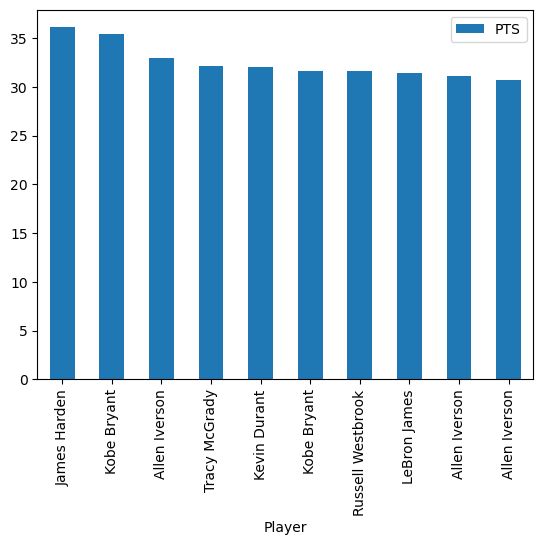

In [194]:
highest_scoring.plot.bar("Player", "PTS")

In [197]:
highest_scoring = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

<Axes: xlabel='Year'>

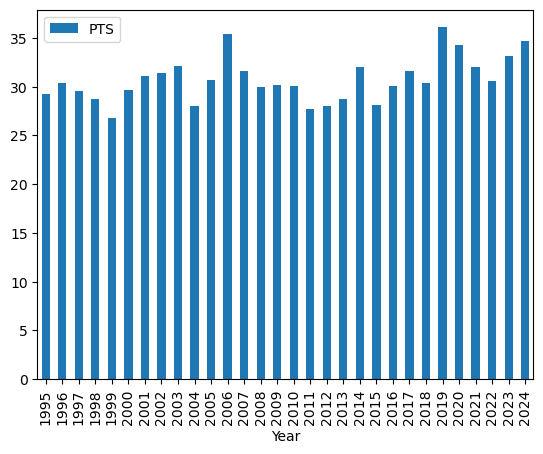

In [198]:
highest_scoring.plot.bar("Year", "PTS")

In [203]:
correlation = stats.corr()["Share"]

/var/folders/xt/5mwj_mdd04b95r90st_cvh480000gn/T/ipykernel_21512/1019319507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = stats.corr()["Share"]


<Axes: >

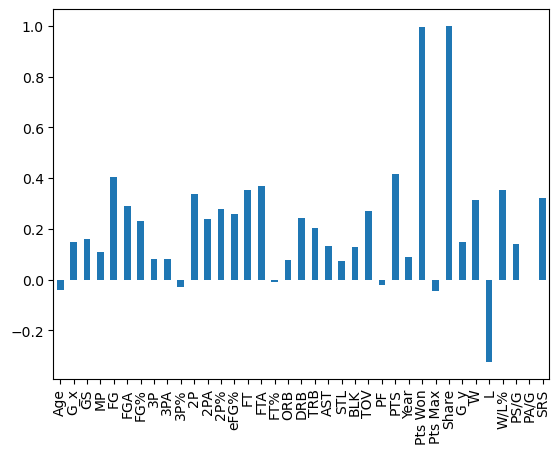

In [204]:
correlation.plot.bar()

/var/folders/xt/5mwj_mdd04b95r90st_cvh480000gn/T/ipykernel_21512/3104463908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()["Age"].plot.bar()


<Axes: >

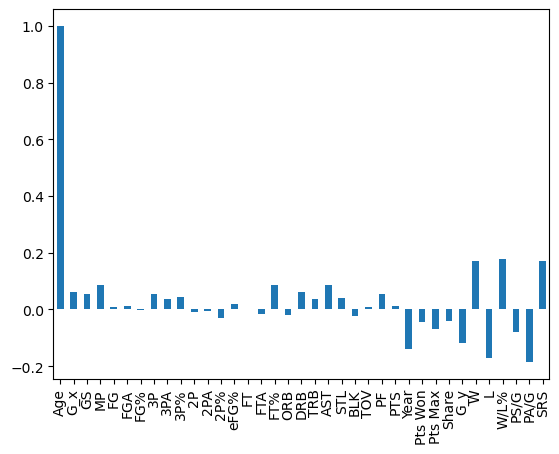

In [205]:
stats.corr()["Age"].plot.bar()

In [206]:
most_efficient = stats[stats["G_y"]>70].sort_values("eFG%", ascending=False).head(10)

<Axes: xlabel='Player', ylabel='eFG%'>

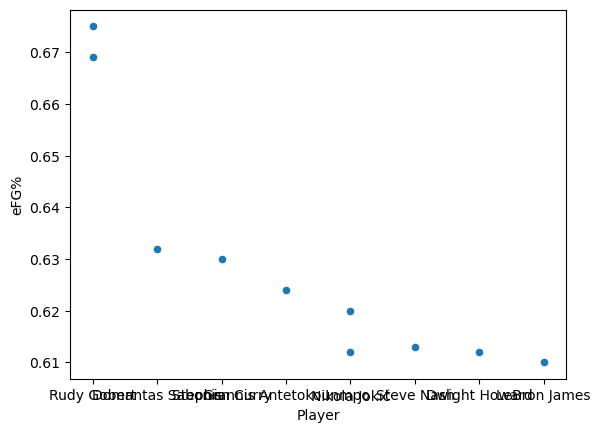

In [211]:
most_efficient.plot.scatter("Player", "eFG%")

<Axes: xlabel='Year'>

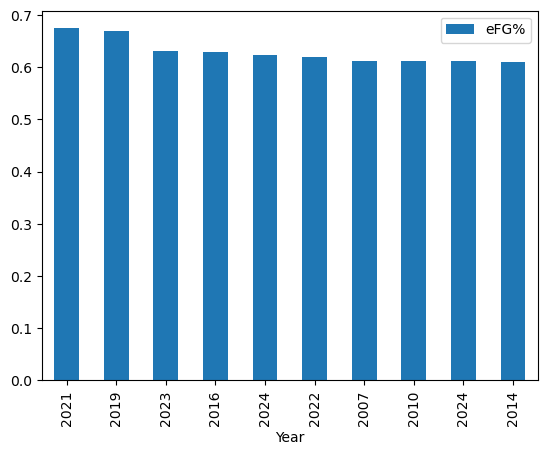

In [209]:
most_efficient.plot.bar("Year", "eFG%")